<a href="https://colab.research.google.com/github/Bogendhra001/textPrediction/blob/main/text_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries 

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

Upload your text files

In [41]:
from google.colab import files
uploaded = files.upload()

Saving dataset.txt to dataset (2).txt


 Open and pre-process the data

In [42]:
file = open("dataset.txt", "r", encoding = "utf8")


lines = []
for i in file:
    lines.append(i)

data = ""
for i in lines:
  data = ' '. join(lines) 

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg EBook of Metamorphosis, by Franz Kafka Translated by David Wyllie. This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org ** This is a COPYRIGHTED Project Gutenberg eBook, Details Below ** ** Please follow the copyright guidelines in this file. ** Title: Metamorphosis Author: Franz Ka'

In [43]:
len(data)

138048

Tokenization

In [44]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 45, 43, 283, 5, 511, 55, 687, 688, 847, 55, 593, 594, 27, 283]

In [45]:
len(sequence_data)

25309

In [46]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)


3068


In [47]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  25306


array([[  1,  45,  43, 283],
       [ 45,  43, 283,   5],
       [ 43, 283,   5, 511],
       [283,   5, 511,  55],
       [  5, 511,  55, 687],
       [511,  55, 687, 688],
       [ 55, 687, 688, 847],
       [687, 688, 847,  55],
       [688, 847,  55, 593],
       [847,  55, 593, 594]])

In [48]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [49]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[  1  45  43]
 [ 45  43 283]
 [ 43 283   5]
 [283   5 511]
 [  5 511  55]
 [511  55 687]
 [ 55 687 688]
 [687 688 847]
 [688 847  55]
 [847  55 593]]
Response:  [283   5 511  55 687 688 847  55 593 594]


In [50]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Creating a model

In [51]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3, 10)             30680     
                                                                 
 lstm_4 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_5 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_5 (Dense)             (None, 3068)              3071068   
                                                                 
Total params: 16,150,748
Trainable params: 16,150,748
Non-trainable params: 0
_________________________________________________________________


Plot the model

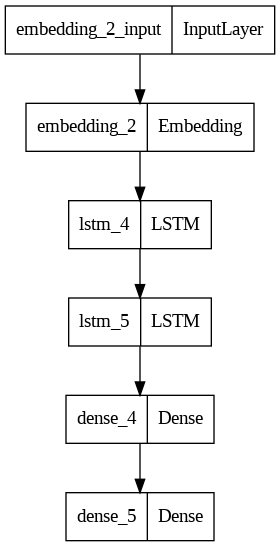

In [53]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

Training the model

In [54]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001),metrics=["accuracy"])
model.fit(X, y, epochs=100, batch_size=64, callbacks=[checkpoint])

Epoch 1/100
396/396 [==============================] - ETA: 0s - loss: 6.4450 - accuracy: 0.0507
Epoch 1: loss improved from inf to 6.44503, saving model to next_words.h5
396/396 [==============================] - 14s 26ms/step - loss: 6.4450 - accuracy: 0.0507
Epoch 2/100
396/396 [==============================] - ETA: 0s - loss: 6.0403 - accuracy: 0.0572
Epoch 2: loss improved from 6.44503 to 6.04026, saving model to next_words.h5
396/396 [==============================] - 6s 15ms/step - loss: 6.0403 - accuracy: 0.0572
Epoch 3/100
394/396 [============================>.] - ETA: 0s - loss: 5.7316 - accuracy: 0.0751
Epoch 3: loss improved from 6.04026 to 5.73187, saving model to next_words.h5
396/396 [==============================] - 6s 16ms/step - loss: 5.7319 - accuracy: 0.0751
Epoch 4/100
396/396 [==============================] - ETA: 0s - loss: 5.3773 - accuracy: 0.1044
Epoch 4: loss improved from 5.73187 to 5.37728, saving model to next_words.h5
396/396 [========================

Predicting

In [55]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

Taking input


In [56]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: and only stopped
['and', 'only', 'stopped']
1/1 [==============================] - 1s 620ms/step
when
Enter your line:  it was covered
['it', 'was', 'covered']
1/1 [==============================] - 0s 20ms/step
with
Enter your line: I'd have given 
['have', 'given', '']
1/1 [==============================] - 1s 621ms/step
a
Enter your line: s a funny
['s', 'a', 'funny']
1/1 [==============================] - 0s 19ms/step
project
Enter your line: from up there
['from', 'up', 'there']
1/1 [==============================] - 0s 19ms/step
especially
Enter your line: 0
Execution completed.....
